https://github.com/MilesLe/Design_Team

TODO: None for now.

In [85]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

Extract Data
- Add new data files here to be processed in the pipeline. 


In [86]:
data_files = {
    "1.2_2_trial7_09102022.csv": "breakaway",
    "1.2_2_trial6_09102022.csv": "breakaway",
    "1.2_2_trial5_09102022.csv": "breakaway"
}

In [93]:
# Data extraction functions
''' 
Purpose: Extract all the data from the data files and organize them and meta data in a data structure.
Input: the data files with their category.
Return: main data structure.
'''
def extract_from_files(files_dict):
    data = {}
    # iterate through each file provided
    for f in files_dict:
        filename = "data/" + f
        category = files_dict[f]
        dataframe = pd.read_csv(filename)
        meta = {}
        # Separate how the meta data is collected for each type of category.
        if category == "breakaway":
            parsed_filename = f.split('_')
            meta["date"] = datetime.strptime(parsed_filename[3][:8], "%d%m%Y")
            meta["trial"] = parsed_filename[2]
            meta["height"] = parsed_filename[0]
            meta["width"] = parsed_filename[1]
        #elif a different category...
        
        # Save the information in the main data structure.
        if category not in data:
            data[category] = {f:{"meta":meta, "dataframe":dataframe}}
        else:
            data[category][f] = {"meta":meta, "dataframe":dataframe}
            
    return data 


In [96]:
# Apply data extraction functions
all_data = extract_from_files(data_files)
    
    

Data Cleaning

In [129]:
# Cleaning and data engineering functions

'''
Purpose: Make all the columns in each dataframes have the same length so
         analysis is easier (you won't run into data shape issues).
Parameters: the main data structure 
Return: formatted main data structure
'''
def make_all_data_set_cols_same_length(data):
    data_c = data
    # categories
    for category_dict in data_c:
        # filenames
        for file_dict in data_c[category_dict]:
            # dataframe
            df = data[category_dict][file_dict]["dataframe"]
            # Replace all the nan's with zero's
            df_formatted = df.fillna(0)
            data[category_dict][file_dict]["dataframe"] = df_formatted
    return data_c



In [131]:
# Apply each cleaning function to each dataframe.
all_data = make_all_data_set_cols_same_length(all_data)


Data Analysis

In [195]:
# Analysis functions

'''
Purpose: Scatter plot of breakaway data and show somes stats
Parameters:
- all_data (main data structure)
- measurements (list): ["Force(N)", "Angle(rad)", "Velocity(rad/s)", "Acceleration(rad/s²)"]
Return: None
'''
def plot_breakaway(data, measurements):

    for filename in data["breakaway"]:
        # Get specific file to analyze
        file_df = data["breakaway"][filename]["dataframe"]
        file_meta = data["breakaway"][filename]["meta"]

        # Get appropriate x col: Time 
        x_cols = [col for col in file_df.columns if "Time(s)" in col]
        largest_x_col = x_cols[0]
        for col in x_cols:
            if file_df[col].values[-1] > file_df[largest_x_col].values[-1]:
                largest_x_col = col

        # Plotting 
        x = file_df[largest_x_col].values
        # For each measurement 
        # Get y-value cols: Force, Angle, Velocity, Acceleration 
        for measurement in measurements:
            cols = [c for c in file_df.columns if measurement in c]
            plt.figure(figsize=(20,10))
            # For each data set 
            for col in cols:
                y = file_df[col].values
                ma = round(max(y),2)
                mi = round(min(y),2)
                auc = round(np.trapz(y, dx=0.02),2)
                plt.plot(x, y, '-o', label=str(col[:11]) + 
                                                 "   max: " + str(ma) + 
                                                 "   min: " + str(mi) + 
                                                 "   AUC: " + str(auc))
            plt.legend(loc="upper right", prop={'size': 12})
            plt.ylabel(measurement)
            plt.xlabel("Time(s)")
            plt.title("Breakaway Test: " + 
                      str(file_meta["date"]) + " " + 
                      str(file_meta["trial"]) + " h: " + 
                      str(file_meta["height"]) + " w: " + 
                      str(file_meta["width"]))
            
            


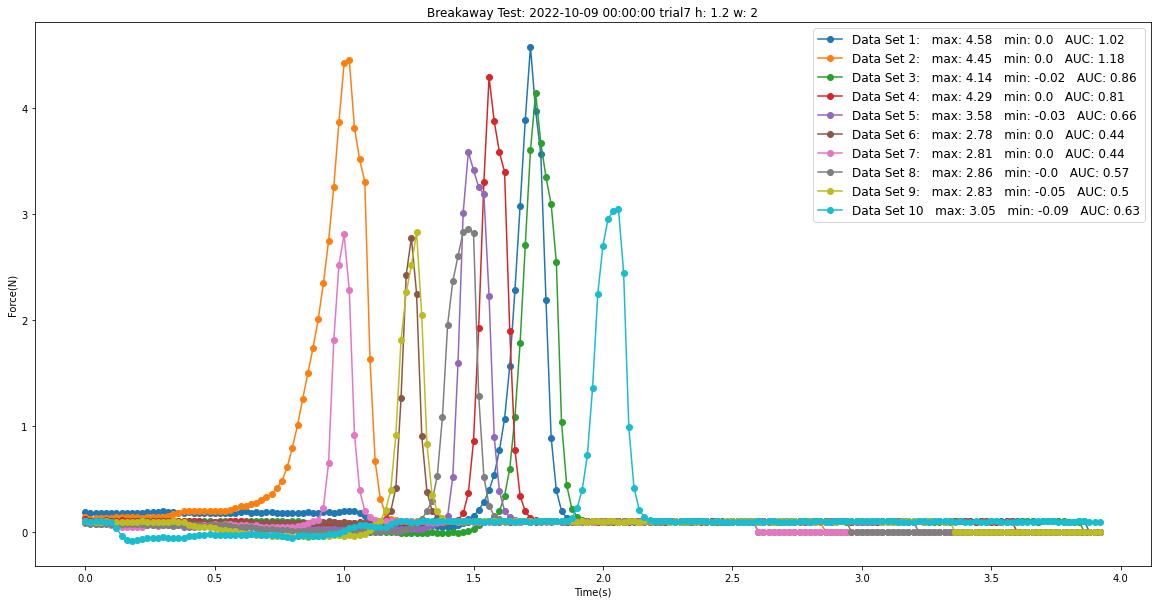

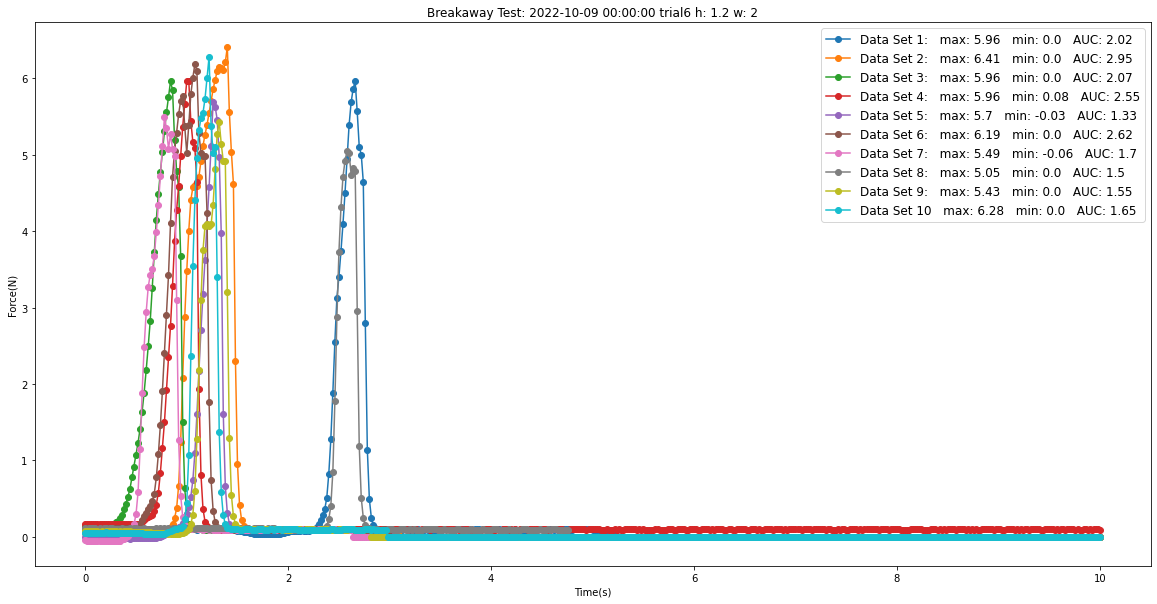

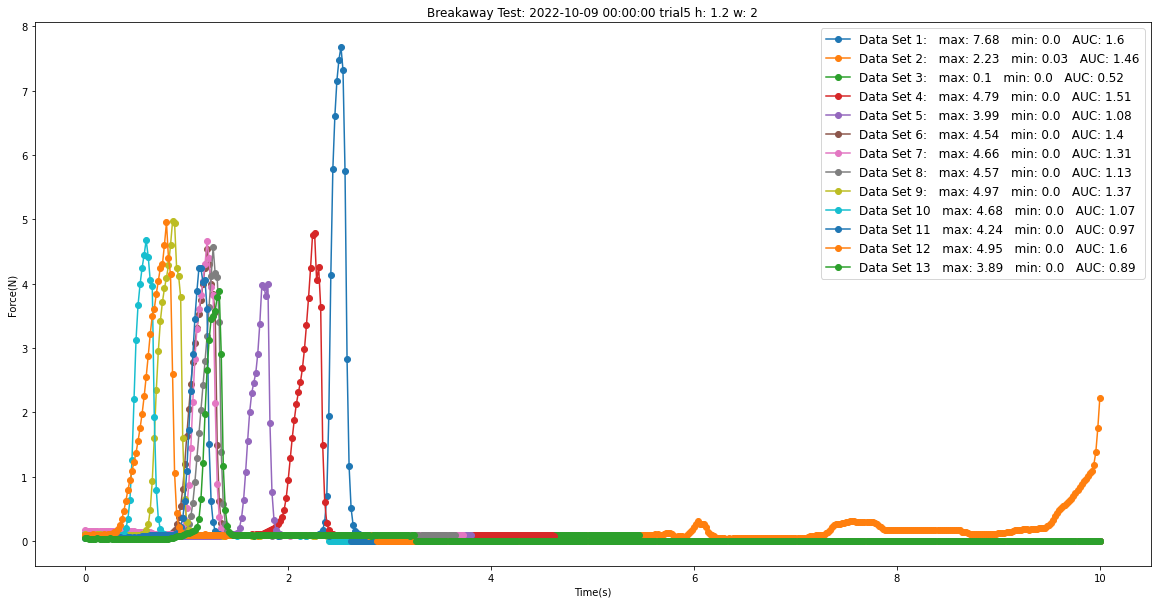

In [196]:
# Apply analysis functions
plot_breakaway(all_data, ["Force(N)"])
